<a href="https://colab.research.google.com/github/Gamearonx/Pre-Boot-Camp-2/blob/main/Decision_Tree_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Setup and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

# Display basic info
print("First 5 rows of data:")
print(data.head())
print("\nDataset Info:")
print(data.info())

First 5 rows of data:
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Ac


Assuming target column is: 'Heart Attack Risk'


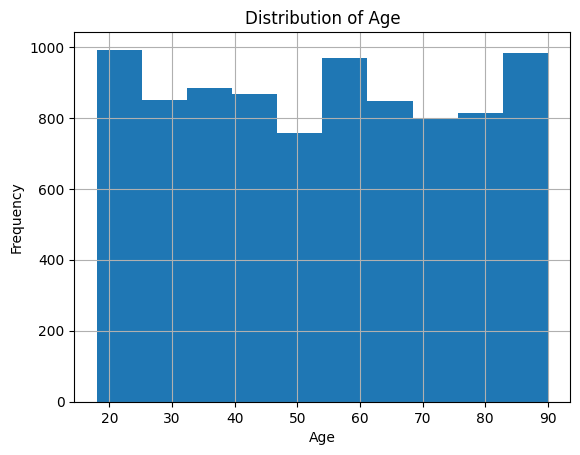

In [10]:
# 2. Data Exploration
# Auto-detect target column (assumes it's the last one)
target_col = data.columns[-1]
print(f"\nAssuming target column is: '{target_col}'")

# Automatically pick a numeric column (not the target) to plot
numeric_cols = data.select_dtypes(include='number').columns.tolist()
sample_col = [col for col in numeric_cols if col != target_col][0]

# Plot histogram of a numeric feature
data[sample_col].hist()
plt.title(f'Distribution of {sample_col}')
plt.xlabel(sample_col)
plt.ylabel('Frequency')
plt.show()

In [12]:
# 3. Preprocessing
print("\nMissing values:")
print(data.isnull().sum())

# Separate features and target
y = data[target_col]
X = data.drop(columns=[target_col])

# Drop non-numeric columns (like IDs or text)
non_numeric_cols = X.select_dtypes(exclude='number').columns.tolist()
if non_numeric_cols:
    print("Dropping non-numeric columns:", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)


Missing values:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64
Dropping

In [13]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# 5. Decision Tree Construction
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
# 6. Model Evaluation
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Model Evaluation:
Accuracy: 0.6390262457208064
Precision: 0.5418190464215569
Recall: 0.6390262457208064
F1 Score: 0.5108505836237978


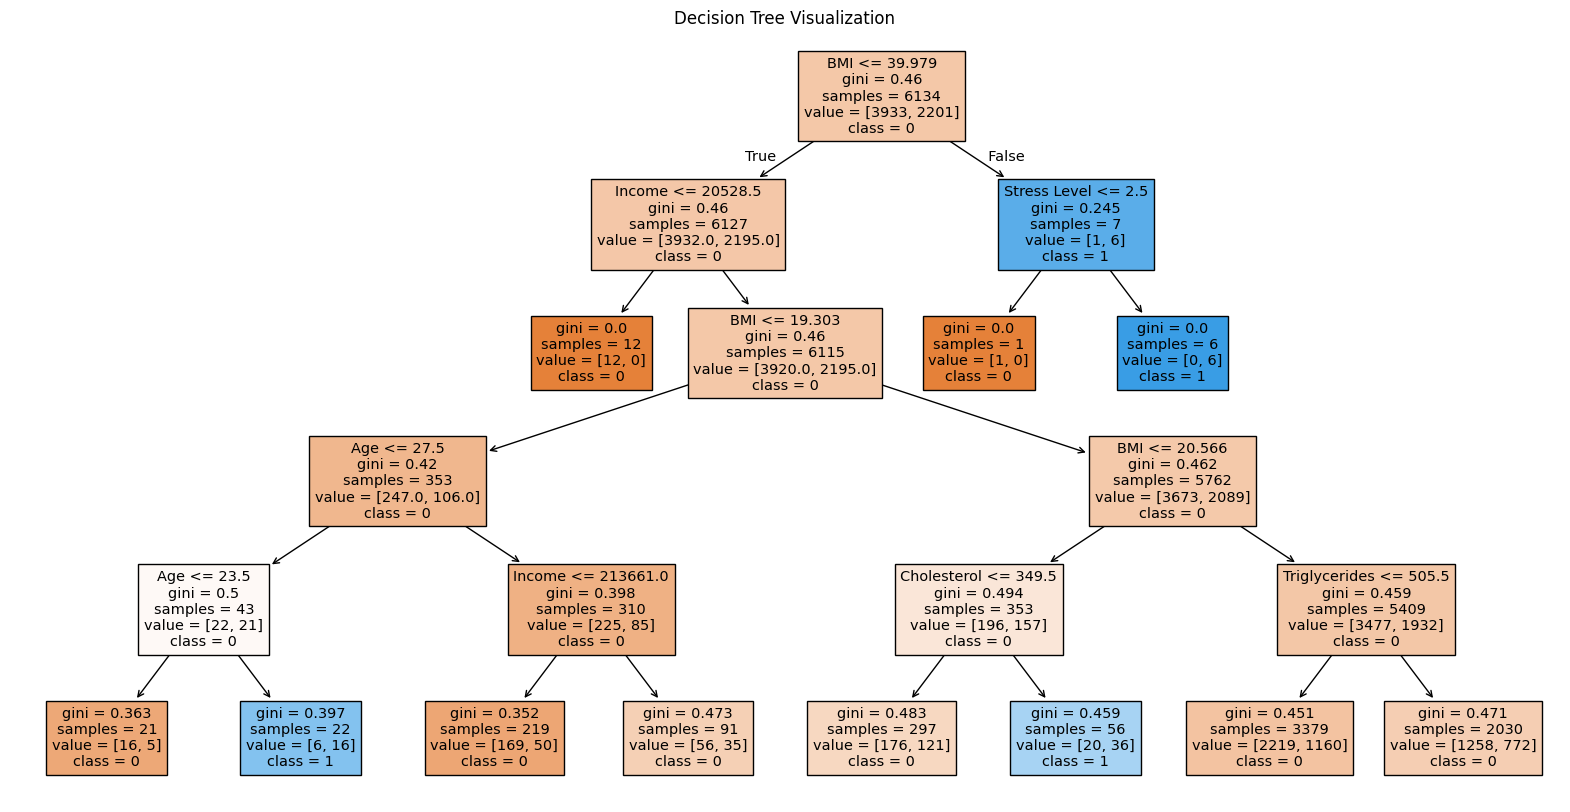

In [16]:
# 7. Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [17]:
# 8. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5]},
             scoring='accuracy')